<a href="https://colab.research.google.com/github/brModulabs/2022_1/blob/main/%EB%B3%91%EB%A5%A0/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('test')

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
iris = load_iris()

In [ ]:
import pandas as pd 
x = pd.DataFrame(data = iris.data)
y = pd.DataFrame(data = iris.target)
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data = x.rename(columns = {0:'국어'})

In [ ]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
target = y
y.describe()

,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
clf = clf.fit(data, y)

import os
IMAGES_PATH = '.'

tree.export_graphviz(
    clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"), 
    feature_names=x.columns,
    
    )

SyntaxError: ignored

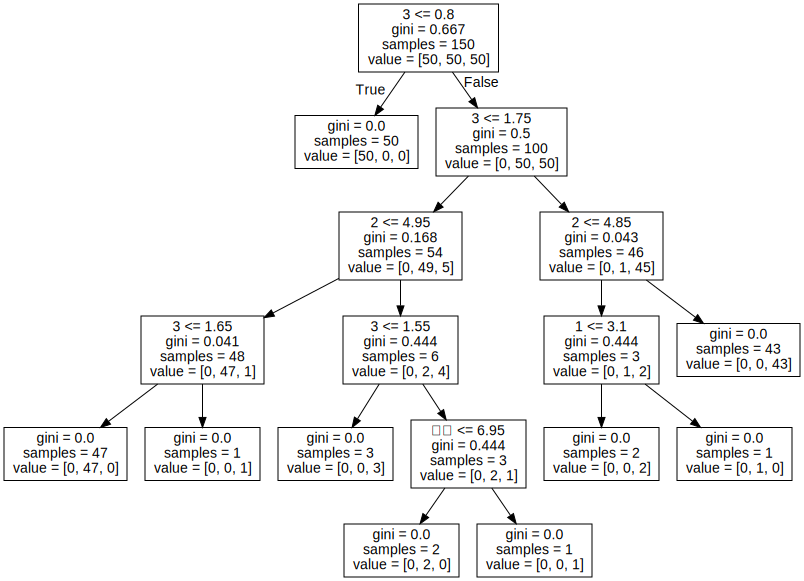

In [ ]:
from graphviz import Source
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


In [ ]:
nltk.download('punkt', download_dir='.')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
! mv -r /root/nltk_data/ ./

In [ ]:
from selenium import webdriver
import time

def get_replys(url,imp_time=5,delay_time=0.1):

    #웹 드라이버
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
    driver.implicitly_wait(imp_time)
    driver.get(url)

    #더보기 계속 클릭하기
    while True:
        try:
            더보기 = driver.find_element_by_css_selector('a.u_cbox_btn_more')
            더보기.click()
            time.sleep(delay_time)
        except:
            break

    html = driver.page_source
    # print(html)

    # 모듈 참조
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'lxml') #html.parser

    # 댓글추출
    contents = soup.select('span.u_cbox_contents')
    contents = [content.text for content in contents]

    #작성자
    nicks = soup.select('span.u_cbox_nick')
    nicks = [nick.text for nick in nicks]

    #날짜 추출
    dates = soup.select('span.u_cbox_date')
    dates = [date.text for date in dates]

    # 취합
    replys = list(zip(nicks,dates,contents))

    driver.quit()
    return replys

from datetime import datetime
start = datetime.now()

url = 'https://entertain.naver.com/ranking/comment/list?oid=022&aid=0003409199'
# url = 'https://entertain.naver.com/ranking/comment/list?oid=076&aid=0003490754'
reply_data = get_replys(url,5,0.1)

import pandas as pd #pandas, openpyxl
col =[ '작성자','날짜','내용']
data_frame = pd.DataFrame(reply_data,columns=col)
data_frame.to_excel('news.xlsx',sheet_name='신서유기',startrow=0,header=True)

end = datetime.now()
print(end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


0:00:09.174940
